# Project Outline
1. Load data and Preprocessing
2. Clustering KMeans
3. Clustering KModes

# Load Data and Preprocessing

In [1]:
# import required libraries
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
data = pd.read_csv('/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv')

In [13]:
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [14]:
print(data.head())

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


Clustering based on groups criteria(Subscription type, Country, Bin of Age, Gender, Device)



In [15]:
data.shape

(2500, 10)

In [16]:
# check datatypes
data.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [17]:
data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


There aren't any missing values in this dataset so there is no need for handling missing values.

In [19]:
# convert dates to datetime objects
data['Join Date'] = pd.to_datetime(data['Join Date'])
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'])

In [20]:
categorical_cols = ['Subscription Type', 'Country', 'Gender', 'Device', 'Plan Duration']

encoded_mapping = {}

for col in categorical_cols:
    label_encoder = LabelEncoder()
    encoded_values = data[col].unique()
    label_encoder.fit(encoded_values)
    data[col] = label_encoder.transform(data[col])
    encoded_mapping[col] = dict(zip(label_encoder.transform(encoded_values), encoded_values))

# Print the mapping
for col, mapping in encoded_mapping.items():
    print(f"{col} Mapping:")
    print(mapping)

Subscription Type Mapping:
{0: 'Basic', 1: 'Premium', 2: 'Standard'}
Country Mapping:
{9: 'United States', 2: 'Canada', 8: 'United Kingdom', 0: 'Australia', 4: 'Germany', 3: 'France', 1: 'Brazil', 6: 'Mexico', 7: 'Spain', 5: 'Italy'}
Gender Mapping:
{1: 'Male', 0: 'Female'}
Device Mapping:
{2: 'Smartphone', 3: 'Tablet', 1: 'Smart TV', 0: 'Laptop'}
Plan Duration Mapping:
{0: '1 Month'}


In [21]:
print(data.head())

   User ID  Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
0        1                  0               10 2022-01-15        2023-10-06   
1        2                  1               15 2021-05-09        2023-06-22   
2        3                  2               12 2023-02-28        2023-06-27   
3        4                  2               12 2022-10-07        2023-06-26   
4        5                  0               10 2023-01-05        2023-06-28   

   Country  Age  Gender  Device  Plan Duration  
0        9   28       1       2              0  
1        2   35       0       3              0  
2        8   42       1       1              0  
3        0   51       0       0              0  
4        4   33       1       2              0  


In [22]:
# drop columns not relevant for clustering
data = data.drop(['User ID', 'Join Date', 'Last Payment Date'], axis=1)

In [23]:
print(data.head())

   Subscription Type  Monthly Revenue  Country  Age  Gender  Device  \
0                  0               10        9   28       1       2   
1                  1               15        2   35       0       3   
2                  2               12        8   42       1       1   
3                  2               12        0   51       0       0   
4                  0               10        4   33       1       2   

   Plan Duration  
0              0  
1              0  
2              0  
3              0  
4              0  


# Clustering KMeans

In [24]:
num_clusters = 6

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

# Analyze clusters
cluster_stats = data.groupby('Cluster').mean()
print(cluster_stats)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Subscription Type  Monthly Revenue   Country        Age    Gender  \
Cluster                                                                      
0                 0.692090        12.460452  2.031073  46.977401  0.443503   
1                 1.193764        12.523385  7.576837  38.826281  0.505568   
2                 1.063025        12.588235  7.306723  30.445378  0.491597   
3                 1.030000        12.526000  7.366000  47.032000  0.492000   
4                 0.665672        12.462687  1.922388  30.355224  0.531343   
5                 0.632124        12.453368  2.240933  38.209845  0.520725   

           Device  Plan Duration  
Cluster                           
0        1.508475            0.0  
1        1.538976            0.0  
2        1.476891            0.0  
3        1.494000            0.0  
4        1.608955            0.0  
5        1.391192            0.0  


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


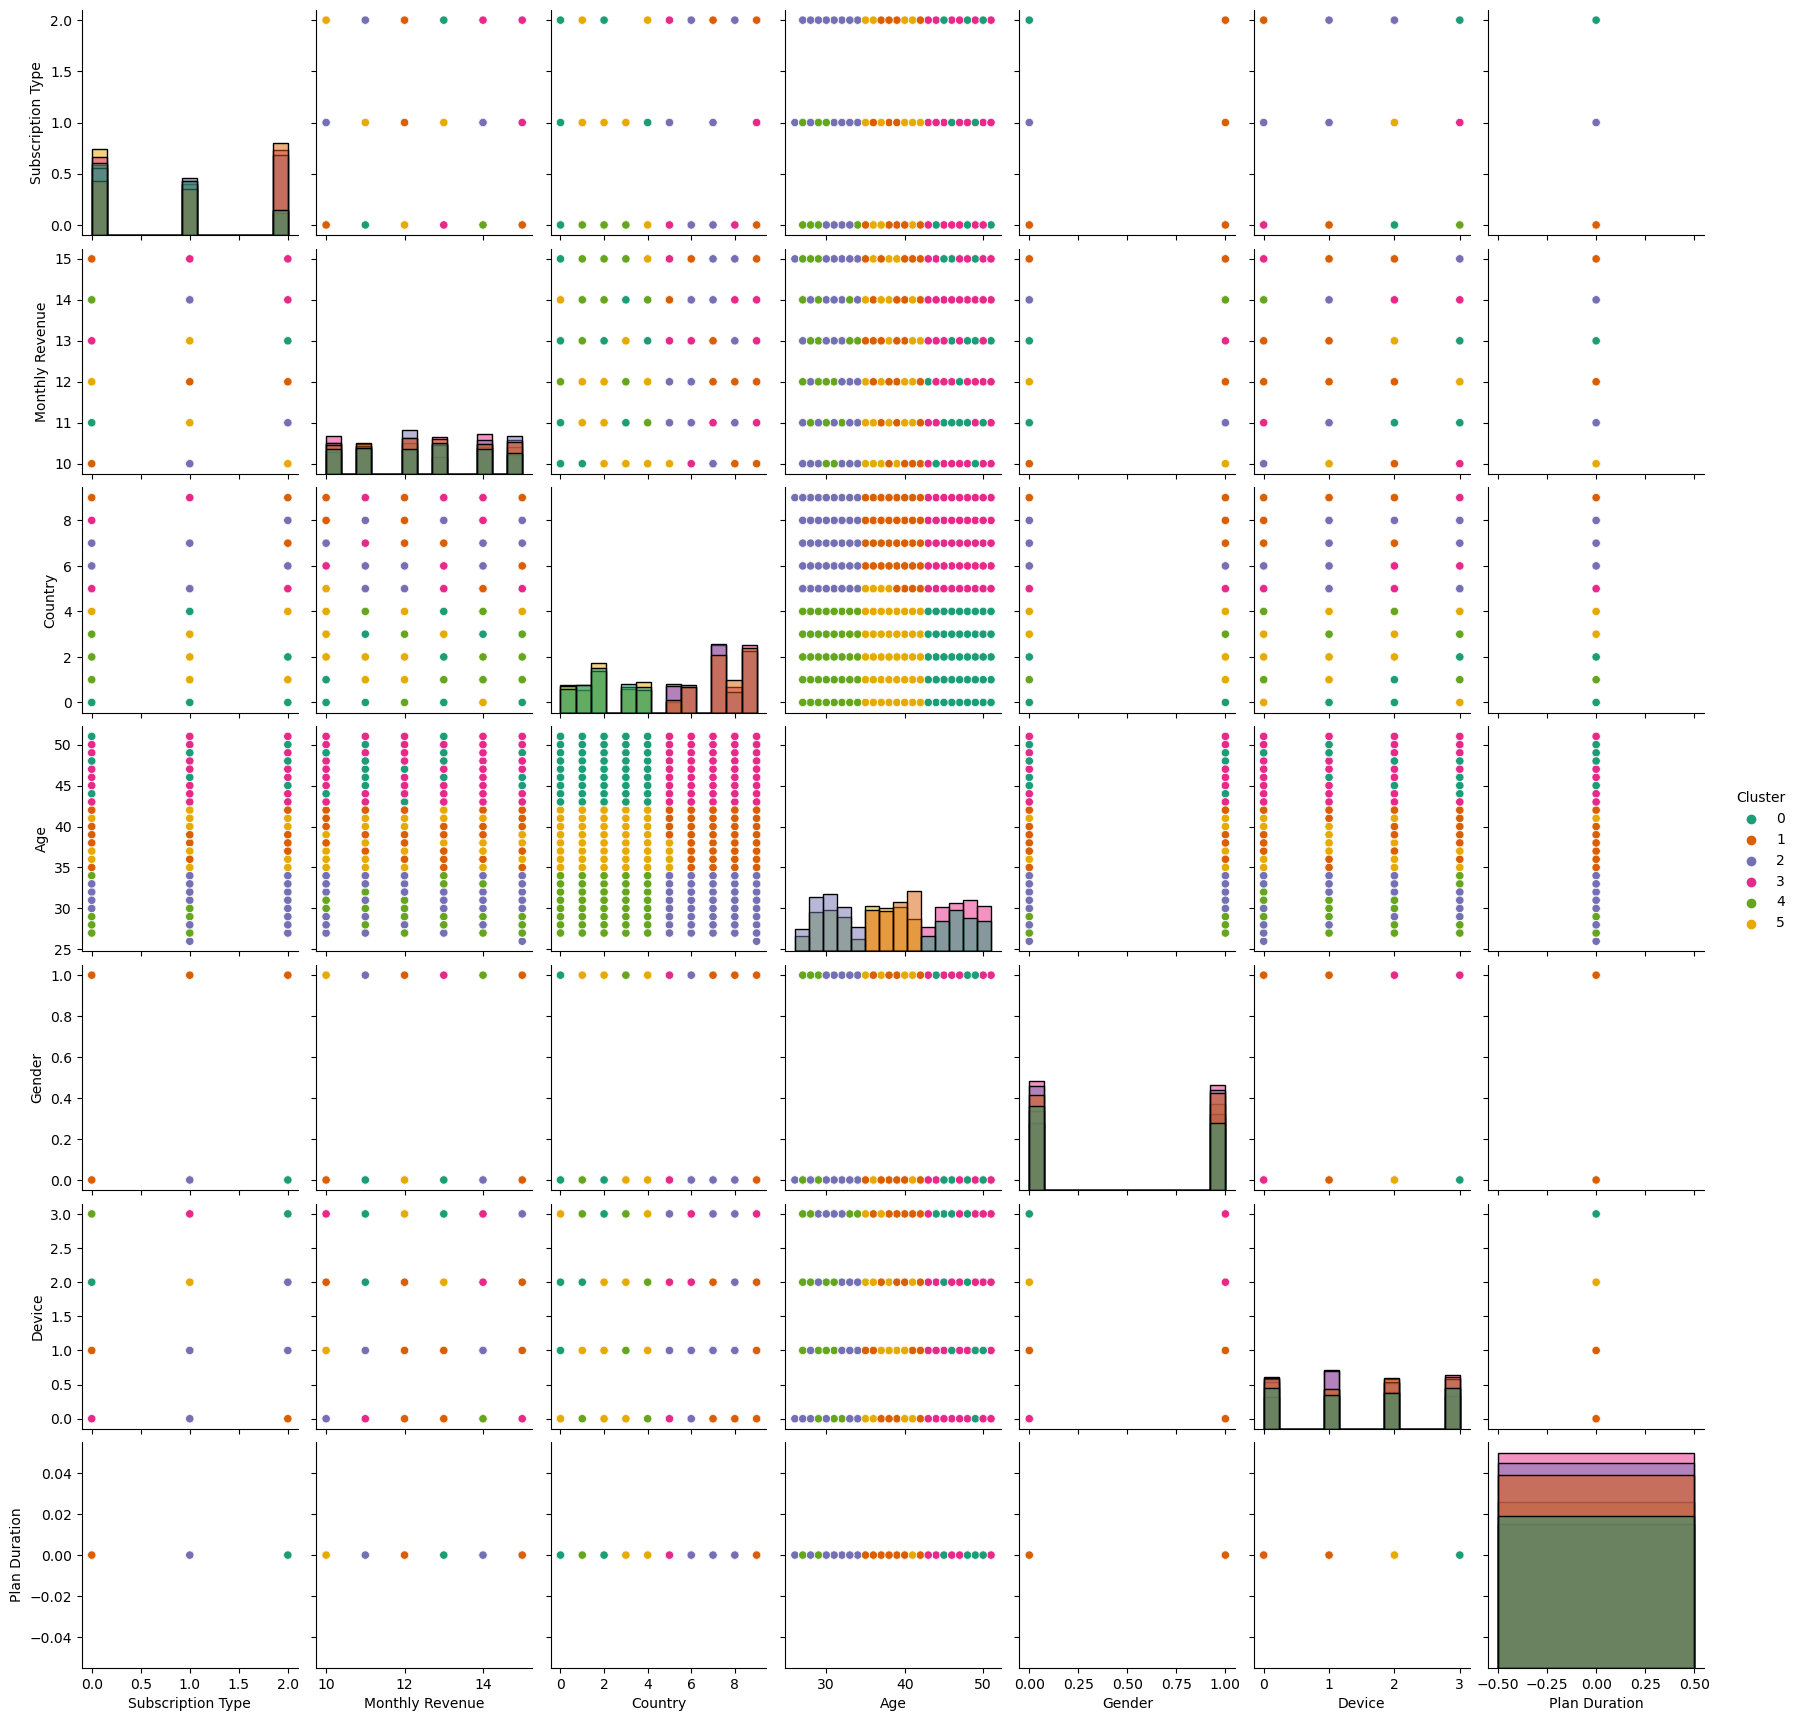

In [25]:
# Visualize pairwise relationships using a pair plot
sns.pairplot(data=data, hue='Cluster', diag_kind='hist', palette='Dark2')
plt.show()

# Clustering KModes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 510, cost: 8497.0
Run 1, iteration: 2/100, moves: 216, cost: 8467.0
Run 1, iteration: 3/100, moves: 10, cost: 8467.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1027, cost: 8816.0
Run 2, iteration: 2/100, moves: 209, cost: 8802.0
Run 2, iteration: 3/100, moves: 1, cost: 8802.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 340, cost: 9170.0
Run 3, iteration: 2/100, moves: 398, cost: 9149.0
Run 3, iteration: 3/100, moves: 5, cost: 9149.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 468, cost: 9076.0
Run 4, iteration: 2/100, moves: 113, cost: 9076.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 593, cost: 8854.0
Run 

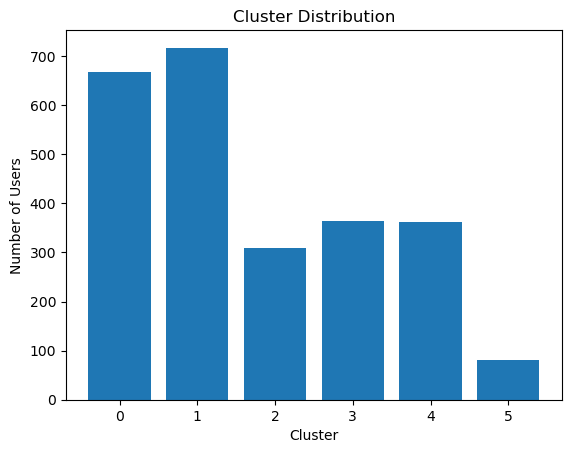

In [27]:
from kmodes.kmodes import KModes

# Perform K-Modes clustering
kmode = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1, random_state=42)
clusters = kmode.fit_predict(data)

# Add the cluster labels to the DataFrame
data['Cluster'] = clusters

# Display the cluster distribution
cluster_distribution = data['Cluster'].value_counts()
print("Cluster Distribution:\n", cluster_distribution)

# Visualize cluster distribution
plt.bar(cluster_distribution.index, cluster_distribution.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.title('Cluster Distribution')
plt.show()

In [28]:
print(data[data['Cluster']==1].describe())

       Subscription Type  Monthly Revenue     Country         Age      Gender  \
count         717.000000       717.000000  717.000000  717.000000  717.000000   
mean            0.627615        12.790795    6.196653   38.404463    0.740586   
std             0.877698         1.582295    2.865045    6.890069    0.438619   
min             0.000000        10.000000    0.000000   27.000000    0.000000   
25%             0.000000        11.000000    5.000000   32.000000    0.000000   
50%             0.000000        13.000000    7.000000   39.000000    1.000000   
75%             2.000000        14.000000    9.000000   43.000000    1.000000   
max             2.000000        15.000000    9.000000   51.000000    1.000000   

           Device  Plan Duration  Cluster  
count  717.000000          717.0    717.0  
mean     1.821478            0.0      1.0  
std      0.843269            0.0      0.0  
min      0.000000            0.0      1.0  
25%      1.000000            0.0      1.0  
50%   

Subscription Type Mapping:
{0: 'Basic', 1: 'Premium', 2: 'Standard'}

Country Mapping:
{9: 'United States', 2: 'Canada', 8: 'United Kingdom', 0: 'Australia', 4: 'Germany', 3: 'France', 1: 'Brazil', 6: 'Mexico', 7: 'Spain', 5: 'Italy'}

Gender Mapping:
{1: 'Male', 0: 'Female'}

Device Mapping:
{2: 'Smartphone', 3: 'Tablet', 1: 'Smart TV', 0: 'Laptop'}

Plan Duration Mapping:
{0: '1 Month'}

The highest number of users are in Cluster 1. Cluster 1 is composed of Users that watch netflix on Smartphones (Device=2.0), Gender is mostly Male, Average Age is 38, Subscription Type is mostly Basic.